Nama : Rohmat<br>
NIM : 211351131<br>
Kelas : TIF Pagi B

## import Dataset

In [183]:
from google.colab import files
files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohmatif","key":"f14538077a6cda2bc2b9cc0bf0fabc0f"}'}

In [184]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



kaggle.json


In [185]:
!kaggle datasets download -d shazadudwadia/supermarket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0% 0.00/323 [00:00<?, ?B/s]
100% 323/323 [00:00<00:00, 1.32MB/s]


In [186]:
!mkdir supermarket
!unzip supermarket.zip -d supermarket
!ls supermarket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Archive:  supermarket.zip
  inflating: supermarket/GroceryStoreDataSet.csv  
GroceryStoreDataSet.csv


# import library yang digunakan

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Data Discovery

In [188]:
df=pd.read_csv('/content/supermarket/GroceryStoreDataSet.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [189]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,"MILK,BREAD,BISCUIT"
count,19
unique,16
top,"BREAD,TEA,BOURNVITA"
freq,2


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MILK,BREAD,BISCUIT  19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [191]:
df.columns=['NAME ITEMS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [192]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,NAME ITEMS
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


## Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-193-b524a05f8d5a>:3: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



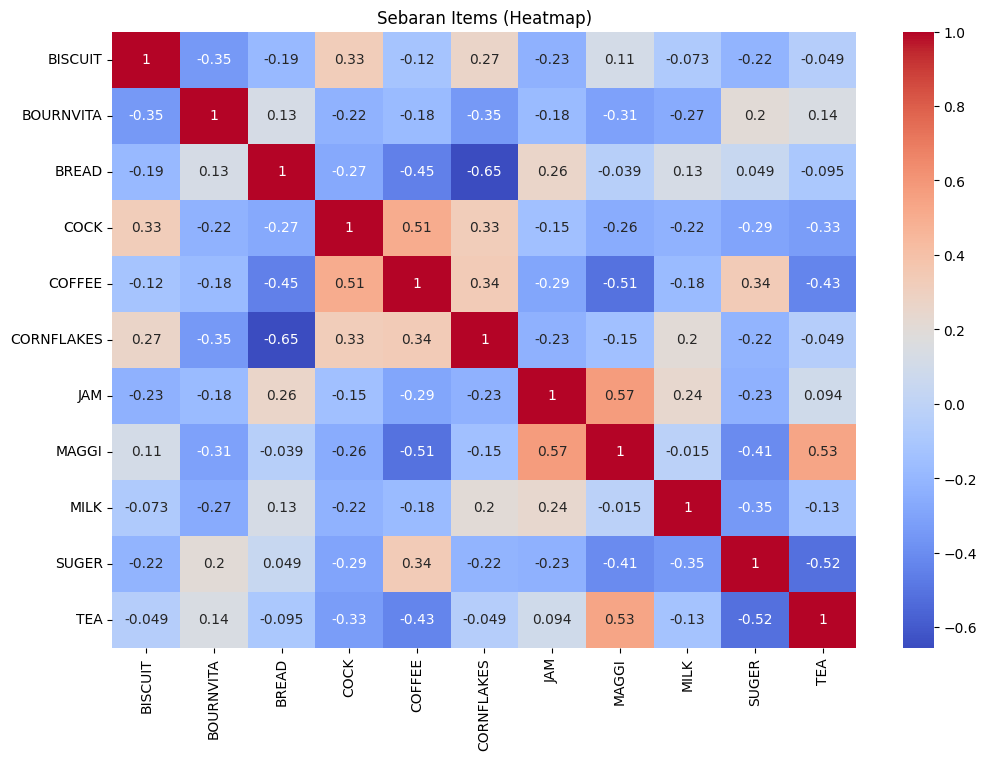

In [193]:
df = pd.DataFrame(data)
transactions = df['NAME ITEMS'].str.split(',')
one_hot_df = pd.get_dummies(transactions.apply(pd.Series).stack()).sum(level=0)
plt.figure(figsize=(12, 8))
sns.heatmap(one_hot_df.corr(), annot=True, cmap="coolwarm")
plt.title('Sebaran Items (Heatmap)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



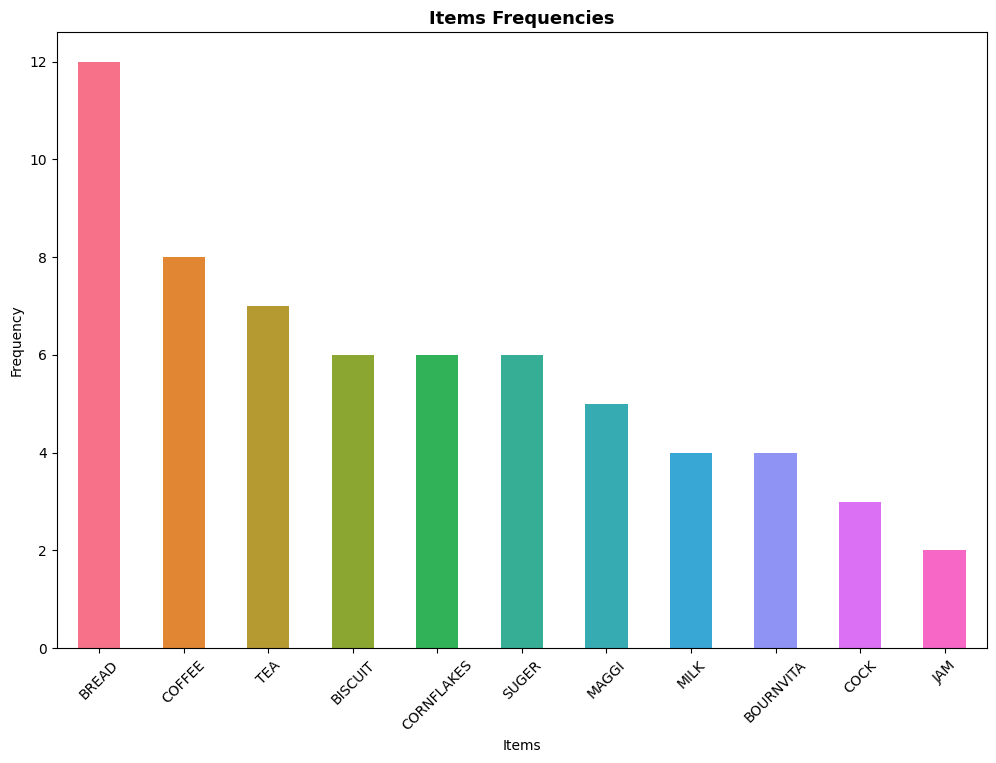

In [194]:
df = pd.DataFrame(data)
df['items_list'] = df['NAME ITEMS'].apply(lambda x: x.split(','))
all_items = [item for sublist in df['items_list'] for item in sublist]
item_counts = pd.Series(all_items).value_counts()
colors = sns.color_palette('husl', len(item_counts))
plt.figure(figsize=(12, 8))
item_counts.plot(kind='bar', color=colors)
plt.title('Items Frequencies', fontsize=13, fontweight='bold')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



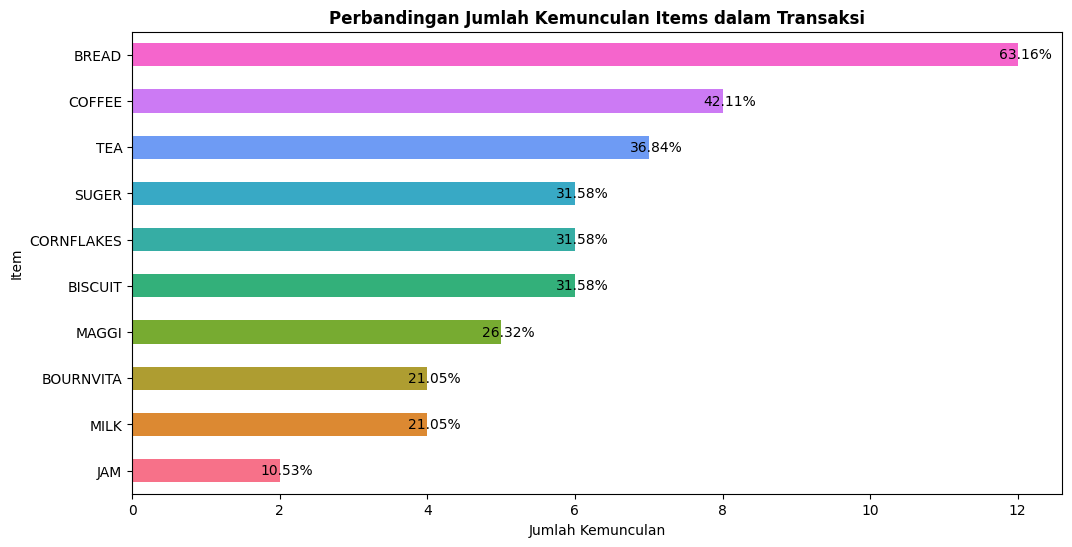

In [195]:
df = pd.DataFrame(data)
items_to_compare = ['JAM', 'MAGGI', 'SUGER', 'COFFEE', 'CHEESE', 'TEA', 'BOURNVITA', 'CORNFLAKES', 'BREAD', 'BISCUIT', 'MILK']
item_counts = df['NAME ITEMS'].apply(lambda x: pd.Series(x.split(','))).stack().value_counts()
item_counts = item_counts[item_counts.index.isin(items_to_compare)]
colors = sns.color_palette('husl', len(item_counts))
plt.figure(figsize=(12, 6))
ax = item_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Perbandingan Jumlah Kemunculan Items dalam Transaksi', fontsize=12, fontweight='bold')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Item')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2 - 0.15,
             f'{(bar.get_width() / len(df) * 100):.2f}%', ha='center', va='bottom', color='black')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



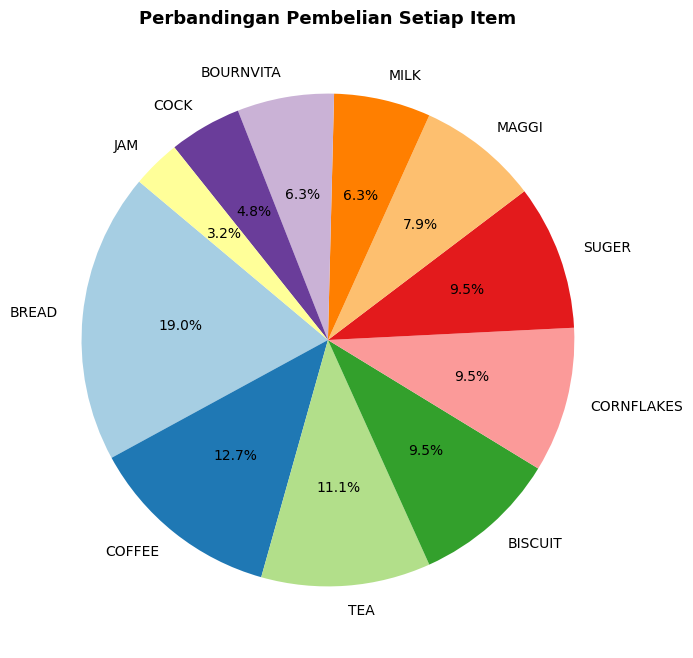

In [196]:
df = pd.DataFrame(data)
item_totals = df['NAME ITEMS'].str.split(',', expand=True).stack().value_counts()

# Pie plot perbandingan pembelian
plt.figure(figsize=(8, 8))
plt.pie(item_totals, labels=item_totals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Perbandingan Pembelian Setiap Item', fontsize=13, fontweight='bold')
plt.show()

In [197]:
df = pd.DataFrame(data)
item_totals = df['NAME ITEMS'].str.split(',', expand=True).stack().value_counts().reset_index()
item_totals.columns = ['itemDescription', 'count']

# Membuat treemap
fig = px.treemap(item_totals, path=['itemDescription'], values='count', title='Frequency Items yang terjual')
fig.update_layout(title_x=0.5, title_font=dict(size=18))
fig.update_traces(textinfo="label+value",textfont=dict(color='white'))
# Menampilkan treemap
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Preprocessing

In [198]:
path=('supermarket/GroceryStoreDataSet.csv')
df = pd.read_csv(path,names = ['items'], sep = ',')
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,items
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [199]:
df_1  = df['items'].apply(lambda x : x.split(','))
df_1.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                [MILK, BREAD, BISCUIT]
1    [BREAD, MILK, BISCUIT, CORNFLAKES]
2               [BREAD, TEA, BOURNVITA]
Name: items, dtype: object

In [200]:
liste = []

for i in range(len(df_1)):
    x = df_1[i]
    print(x)
    liste.append(x)

['MILK', 'BREAD', 'BISCUIT']
['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES']
['BREAD', 'TEA', 'BOURNVITA']
['JAM', 'MAGGI', 'BREAD', 'MILK']
['MAGGI', 'TEA', 'BISCUIT']
['BREAD', 'TEA', 'BOURNVITA']
['MAGGI', 'TEA', 'CORNFLAKES']
['MAGGI', 'BREAD', 'TEA', 'BISCUIT']
['JAM', 'MAGGI', 'BREAD', 'TEA']
['BREAD', 'MILK']
['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES']
['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES']
['COFFEE', 'SUGER', 'BOURNVITA']
['BREAD', 'COFFEE', 'COCK']
['BREAD', 'SUGER', 'BISCUIT']
['COFFEE', 'SUGER', 'CORNFLAKES']
['BREAD', 'SUGER', 'BOURNVITA']
['BREAD', 'COFFEE', 'SUGER']
['BREAD', 'COFFEE', 'SUGER']
['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [201]:
encoder = TransactionEncoder()
pred = encoder.fit_transform(liste)
df = pd.DataFrame(pred,columns = encoder.columns_)
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


# modeling

In [202]:
frequency = apriori(df,min_support = 0.15,use_colnames = True,verbose = 1)
frequency

Processing 117 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
5,0.30,(CORNFLAKES)
6,0.25,(MAGGI)
7,0.25,(MILK)
8,0.30,(SUGER)
9,0.35,(TEA)


In [203]:
rules =  association_rules(frequency,metric = 'lift',min_threshold = 0.8)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051
2,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538
3,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571
4,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667
5,(BREAD),(BOURNVITA),0.65,0.20,0.15,0.230769,1.153846,0.0200,1.040000,0.380952
6,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000
7,(BREAD),(MAGGI),0.65,0.25,0.15,0.230769,0.923077,-0.0125,0.975000,-0.192308
8,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333,0.535714
9,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000,0.250000


In [204]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedents : list(antecedents)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequents : list(consequents)[0])
rules['rule'] = rules.index
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603,BISCUIT,BREAD,0
1,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051,BREAD,BISCUIT,1
2,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538,BISCUIT,CORNFLAKES,2
3,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571,CORNFLAKES,BISCUIT,3
4,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667,BOURNVITA,BREAD,4
5,(BREAD),(BOURNVITA),0.65,0.20,0.15,0.230769,1.153846,0.0200,1.040000,0.380952,BREAD,BOURNVITA,5
6,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000,MAGGI,BREAD,6
7,(BREAD),(MAGGI),0.65,0.25,0.15,0.230769,0.923077,-0.0125,0.975000,-0.192308,BREAD,MAGGI,7
8,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333,0.535714,BREAD,MILK,8
9,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000,0.250000,MILK,BREAD,9


In [205]:
rules.sort_values('lift',ascending = False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
15,(COCK),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882,COCK,COFFEE,15
14,(COFFEE),(COCK),0.40,0.15,0.15,0.375000,2.500000,0.0900,1.36,1.000000,COFFEE,COCK,14
21,(TEA),(MAGGI),0.35,0.25,0.20,0.571429,2.285714,0.1125,1.75,0.865385,TEA,MAGGI,21
20,(MAGGI),(TEA),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.25,0.750000,MAGGI,TEA,20
19,(SUGER),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.80,0.571429,SUGER,COFFEE,19


In [206]:
rules.sort_values('confidence',ascending = False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
15,(COCK),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882,COCK,COFFEE,15
9,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.75,0.250000,MILK,BREAD,9
20,(MAGGI),(TEA),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.25,0.750000,MAGGI,TEA,20
4,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.40,0.166667,BOURNVITA,BREAD,4
11,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.05,0.035714,SUGER,BREAD,11


# Visualisasi hasil algoritma

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



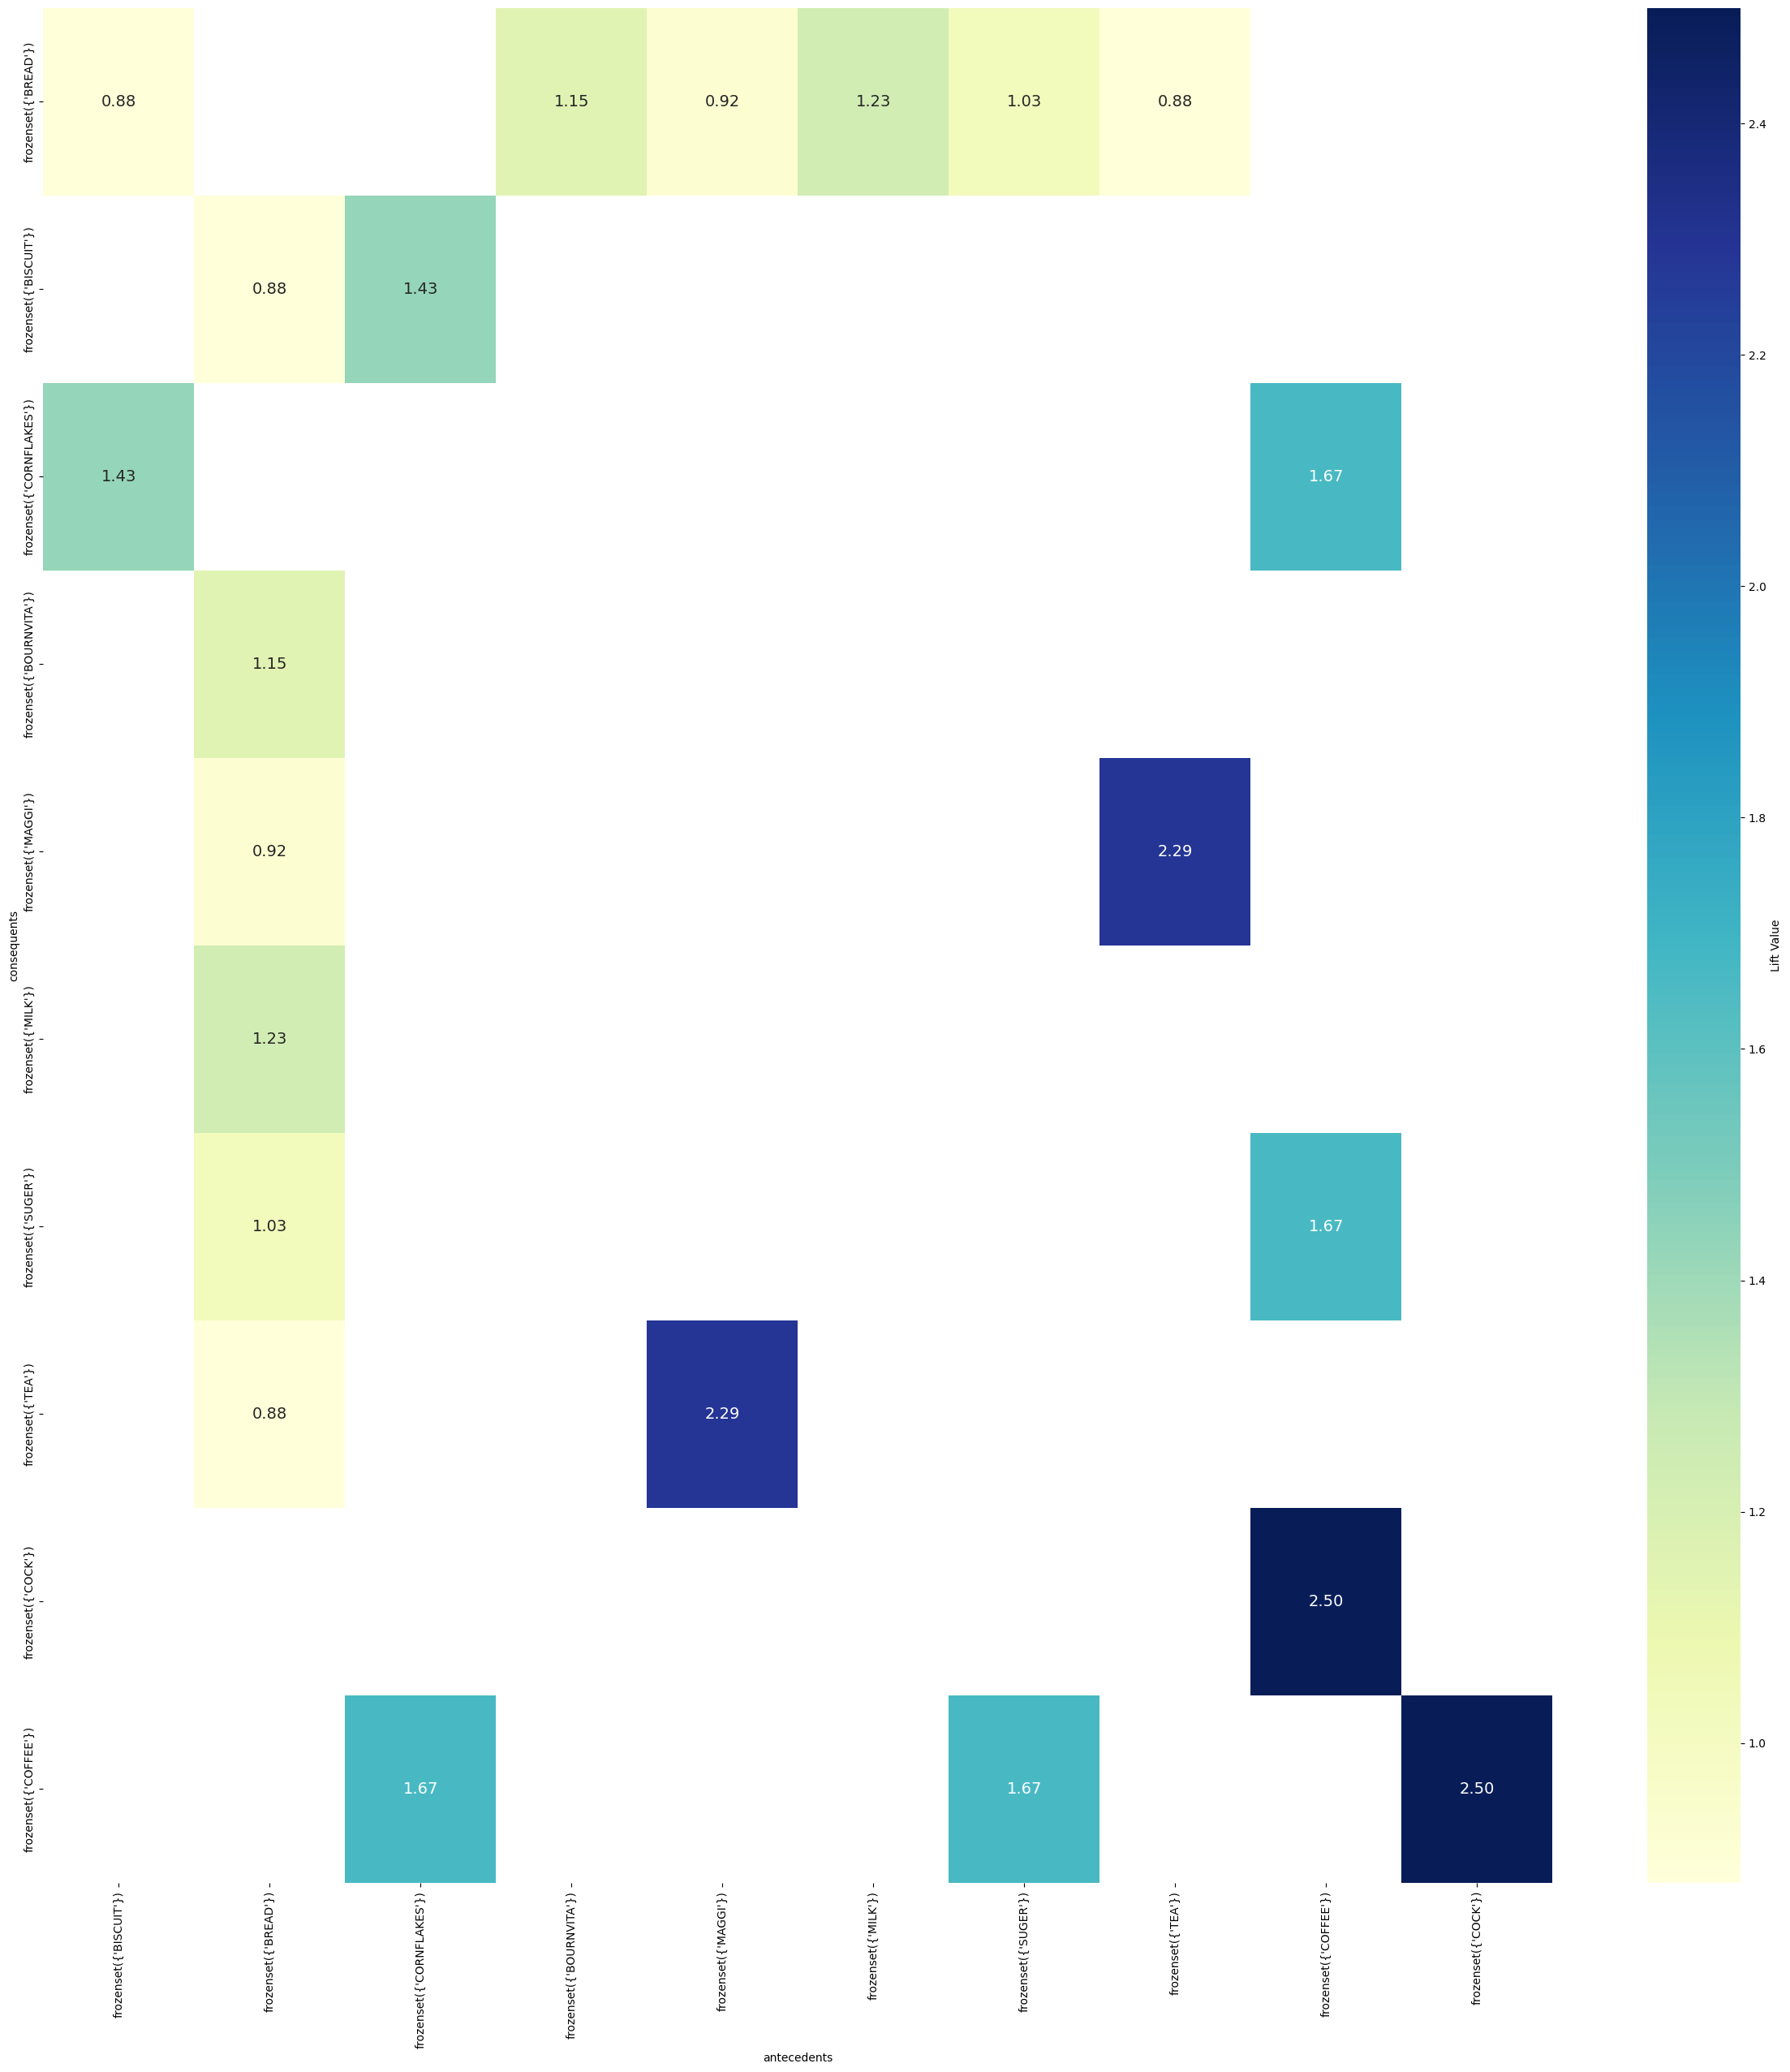

In [207]:
fig, ax = plt.subplots(figsize = (30,30))
pivot = rules.pivot(index = 'consequents',
                   columns = 'antecedents', values= 'lift')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', cbar=True, fmt='.2f', annot_kws={"size": 14},
            cbar_kws={'label': 'Lift Value'})
plt.show()

In [208]:
fig = px.scatter(x=rules['support'], y=rules['confidence'])

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: >

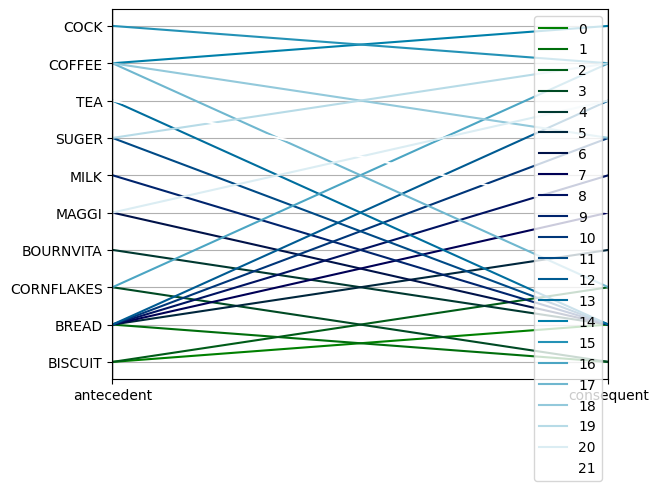

In [209]:
cords = rules[['antecedent','consequent','rule']]

parallel_coordinates(cords,'rule',colormap = 'ocean')

# save model (pickle)

### Dikarenakan pada Apriori Stremlit.py menggunakan csv dari kaggle ketika melakukan load data, Maka tidak perlu melakukan import pickle.sav.